# Practica 1 Aprendizaje Automatico

## Analisis de Datos Exploratorio

In [68]:
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [69]:
df = pd.read_csv('Datos/wind_ava.csv', index_col=0)
df.head()

,energy,p54.162.1,p54.162.2,p54.162.3,p54.162.4,p54.162.5,p54.162.6,p54.162.7,p54.162.8,p54.162.9,...,v100.16,v100.17,v100.18,v100.19,v100.20,v100.21,v100.22,v100.23,v100.24,v100.25
datetime,,,,,,,,,,,,,,,,,,,,,
2005-01-02 18:00:00,402.71,2.534970e+06,2.526864e+06,2.518754e+06,2.510648e+06,2.502537e+06,2.531111e+06,2.522721e+06,2.514330e+06,2.505940e+06,...,-4.683596,-4.545396,-4.407196,-4.268996,-4.131295,-4.669626,-4.528932,-4.388736,-4.248540,-4.107846
2005-01-03 00:00:00,696.80,2.537369e+06,2.529277e+06,2.521184e+06,2.513088e+06,2.504995e+06,2.533465e+06,2.525088e+06,2.516716e+06,2.508339e+06,...,-3.397886,-3.257192,-3.115998,-2.975304,-2.834609,-3.396390,-3.254198,-3.112506,-2.970314,-2.828622
2005-01-03 06:00:00,1591.15,2.533727e+06,2.525703e+06,2.517678e+06,2.509654e+06,2.501629e+06,2.529801e+06,2.521496e+06,2.513187e+06,2.504882e+06,...,-1.454105,-1.296447,-1.138290,-0.980134,-0.822476,-1.459094,-1.302933,-1.147271,-0.991110,-0.834949
2005-01-03 12:00:00,1338.62,2.534491e+06,2.526548e+06,2.518609e+06,2.510670e+06,2.502732e+06,2.530569e+06,2.522346e+06,2.514127e+06,2.505904e+06,...,1.255015,1.370265,1.485515,1.600765,1.716015,1.210612,1.319376,1.428140,1.536405,1.645169
2005-01-03 18:00:00,562.50,2.529543e+06,2.521623e+06,2.513702e+06,2.505782e+06,2.497861e+06,2.525621e+06,2.517421e+06,2.509215e+06,2.501015e+06,...,1.939031,2.023847,2.108663,2.193977,2.278793,1.873673,1.953000,2.031829,2.111157,2.189986


### Limpieza de los datos

Eliminar todos los molinos que no son sotavento (terminan en !=13)

In [70]:
# Eliminar todos los molinos que no son sotavento (borrar todas las columnas que no terminen en 13)
df = df[df.columns[df.columns.str.endswith('13')]]
df.head()

,p54.162.13,p55.162.13,cape.13,p59.162.13,lai_lv.13,lai_hv.13,u10n.13,v10n.13,sp.13,stl1.13,...,t2m.13,stl2.13,stl3.13,iews.13,inss.13,stl4.13,fsr.13,flsr.13,u100.13,v100.13
datetime,,,,,,,,,,,,,,,,,,,,,
2005-01-02 18:00:00,2.510824e+06,9.186295,13.527577,1.386937e+06,2.344111,2.432983,-0.757587,-1.922799,99846.319914,280.960661,...,280.473098,281.042026,281.462478,-0.057958,-0.138650,284.684755,0.404731,-5.927092,-1.780562,-4.443617
2005-01-03 00:00:00,2.513173e+06,8.849569,6.896412,1.153526e+06,2.343719,2.432838,-1.412620,-1.403011,99917.733093,279.296651,...,278.286616,280.747406,281.486541,-0.103576,-0.083050,284.667948,0.404920,-5.913881,-3.743344,-3.129469
2005-01-03 06:00:00,2.509627e+06,7.924080,4.774439,1.098754e+06,2.343300,2.432704,-2.290185,-0.754580,99764.378681,278.233956,...,277.206490,280.114863,281.487095,-0.165721,-0.036241,284.651914,0.405704,-5.908272,-5.097203,-1.157748
2005-01-03 12:00:00,2.510571e+06,6.922709,0.000000,1.076021e+06,2.342830,2.432514,-3.497855,1.271028,99672.670459,280.787263,...,280.926600,279.991138,281.472435,-0.275550,0.098192,284.636266,0.403967,-5.961995,-4.500835,1.502478
2005-01-03 18:00:00,2.505664e+06,6.646282,0.000000,1.070830e+06,2.342437,2.432369,-0.971249,0.553060,99372.811211,279.583112,...,277.363875,280.576898,281.473265,-0.056553,0.041844,284.620232,0.403808,-5.987860,-3.392324,2.131114


Comprobaremos si hay datos nulos o con insuficientes valores imprimiendo por pantalla la información del dataframe

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4748 entries, 2005-01-02 18:00:00 to 2009-12-31 18:00:00
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   p54.162.13  4748 non-null   float64
 1   p55.162.13  4748 non-null   float64
 2   cape.13     4748 non-null   float64
 3   p59.162.13  4748 non-null   float64
 4   lai_lv.13   4748 non-null   float64
 5   lai_hv.13   4748 non-null   float64
 6   u10n.13     4748 non-null   float64
 7   v10n.13     4748 non-null   float64
 8   sp.13       4748 non-null   float64
 9   stl1.13     4748 non-null   float64
 10  u10.13      4748 non-null   float64
 11  v10.13      4748 non-null   float64
 12  t2m.13      4748 non-null   float64
 13  stl2.13     4748 non-null   float64
 14  stl3.13     4748 non-null   float64
 15  iews.13     4748 non-null   float64
 16  inss.13     4748 non-null   float64
 17  stl4.13     4748 non-null   float64
 18  fsr.13      4748 non-null   float64
 19 

In [72]:
# comprobar si hay columnas constantes
print(df.columns[df.nunique() == 1].tolist())

[]


In [73]:
# comprobar que variables son categoricas y cuales son numericas
categorical = df.columns[df.dtypes == 'object'].tolist()
numerical = df.columns[df.dtypes != 'object'].tolist()
print(categorical)
print(numerical)
print(df.nunique())


[]
['p54.162.13', 'p55.162.13', 'cape.13', 'p59.162.13', 'lai_lv.13', 'lai_hv.13', 'u10n.13', 'v10n.13', 'sp.13', 'stl1.13', 'u10.13', 'v10.13', 't2m.13', 'stl2.13', 'stl3.13', 'iews.13', 'inss.13', 'stl4.13', 'fsr.13', 'flsr.13', 'u100.13', 'v100.13']
p54.162.13    4441
p55.162.13    4425
cape.13       1325
p59.162.13    4196
lai_lv.13     1468
lai_hv.13     1435
u10n.13       4395
v10n.13       4396
sp.13         4167
stl1.13       4477
u10.13        4361
v10.13        4387
t2m.13        4469
stl2.13       4517
stl3.13       4511
iews.13       3934
inss.13       3999
stl4.13       4560
fsr.13        2306
flsr.13       3650
u100.13       4387
v100.13       4429
dtype: int64


Podemos ver que son todas categoricas, lo cual se confirma viendo la cantidad de valores unicos de cada variable

### Estudio de la calidad de las variables

Ahora, exploraremos entre las variables cuáles son las que aportan más a la variable dependiente,
en nuestro caso "cape.13".

matriz de correlacion con la variable objetivo

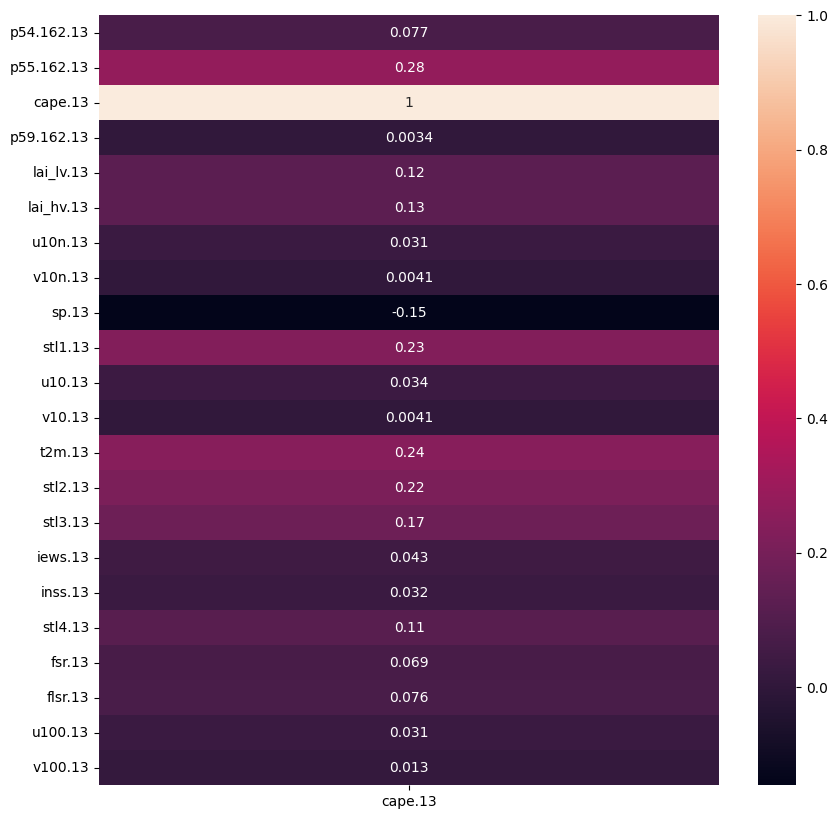

In [74]:
# estudio de la calidad de los datos
# matriz de correlacion
correlation = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation[['cape.13']], annot=True)
plt.show()

Matriz de correlacion de las variables entre si

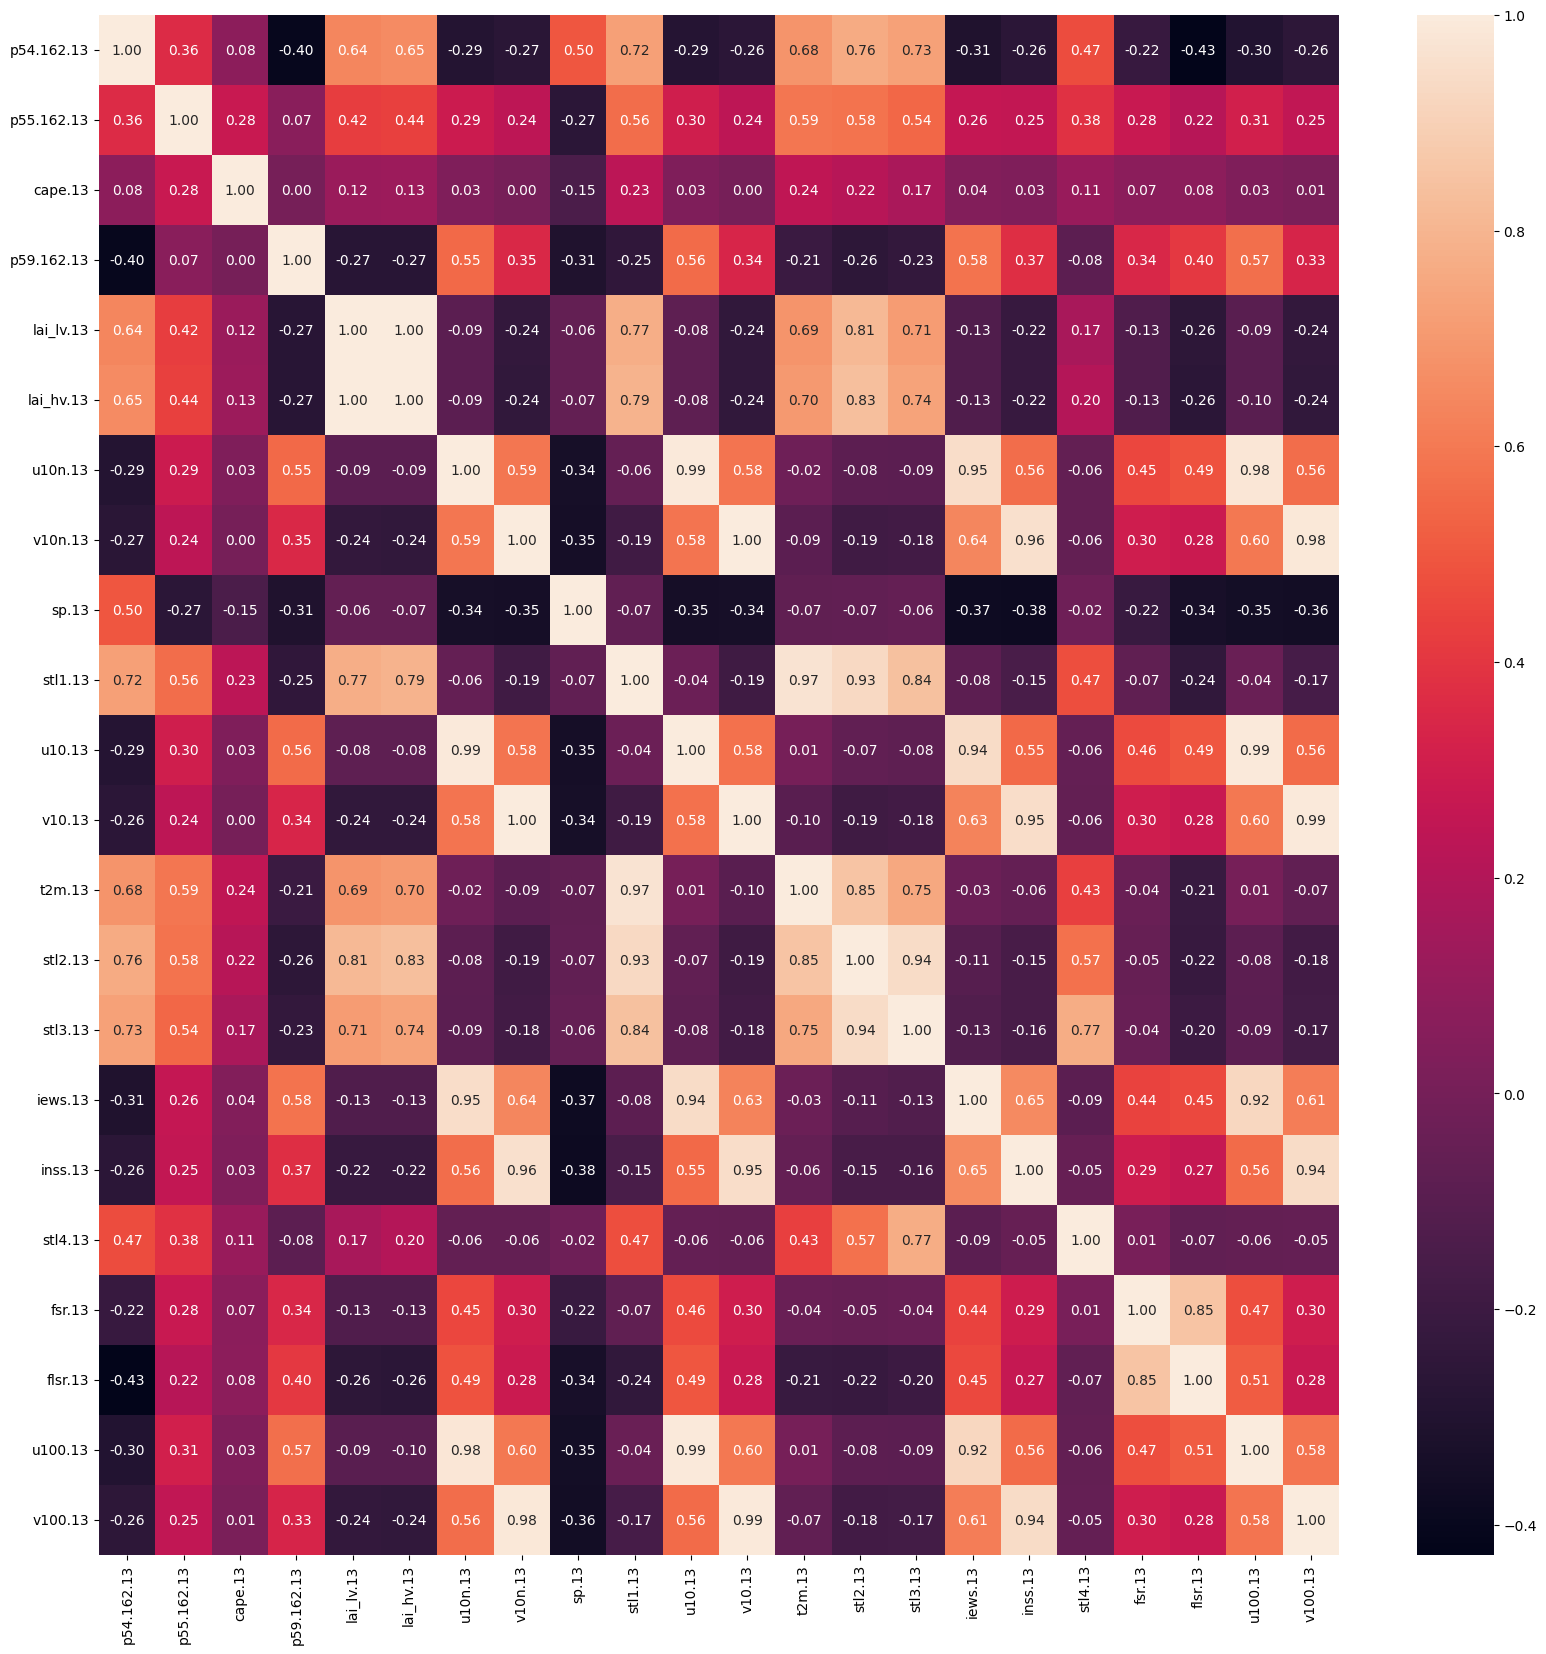

In [75]:
# matriz de correlacion de todas las variables
correlation = df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correlation, annot=True, fmt='.2f')
plt.show()


In [77]:
# see what variables are correlated with cape.13
correlation_cape13 = correlation['cape.13'].sort_values(ascending=False)
correlation_cape13

cape.13       1.000000
p55.162.13    0.275533
t2m.13        0.243220
stl1.13       0.233210
stl2.13       0.215031
stl3.13       0.173513
lai_hv.13     0.128238
lai_lv.13     0.123329
stl4.13       0.113361
p54.162.13    0.076709
flsr.13       0.075812
fsr.13        0.069333
iews.13       0.042621
u10.13        0.033782
inss.13       0.032277
u100.13       0.031293
u10n.13       0.030579
v100.13       0.013124
v10n.13       0.004093
v10.13        0.004071
p59.162.13    0.003355
sp.13        -0.146495
Name: cape.13, dtype: float64

In [ ]:
import pprint as pp

correlation = df.corr()
# Para cada columna, encuentra las 3 variables más correlacionadas
correlation_dict = {}
for col in correlation.columns:
    correlation_dict[col] = correlation[col].sort_values(ascending=False)[1:4].to_dict()

pp.pprint(correlation_dict)

{'cape.13': {'p55.162.13': 0.27553282449422056,
             'stl1.13': 0.23320990378315648,
             't2m.13': 0.24321989339266217},
 'flsr.13': {'fsr.13': 0.8513898477312147,
             'u10.13': 0.4938035807940866,
             'u100.13': 0.513567300345785},
 'fsr.13': {'flsr.13': 0.8513898477312147,
            'u10.13': 0.4593209844127694,
            'u100.13': 0.47350676387771373},
 'iews.13': {'u10.13': 0.9391773235690463,
             'u100.13': 0.9237940910401499,
             'u10n.13': 0.9478208283502696},
 'inss.13': {'v10.13': 0.9480204353107974,
             'v100.13': 0.9391045922280462,
             'v10n.13': 0.9558746848828626},
 'lai_hv.13': {'lai_lv.13': 0.9986147399001334,
               'stl1.13': 0.7895984718684155,
               'stl2.13': 0.8337276229903379},
 'lai_lv.13': {'lai_hv.13': 0.9986147399001334,
               'stl1.13': 0.77376240653188,
               'stl2.13': 0.8141160305641802},
 'p54.162.13': {'stl1.13': 0.7233776081396844,
           